In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import csv
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

Defined function to clean all the imported data 

In [63]:
def process_data(df):
    df.drop(columns=['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time' ], inplace=True)
    df.rename(columns={'Customer/Vendor Name' : 'Customer','Non-Inventory Quantity': 'Qty', 'Transaction Date' : 'Date'}, inplace=True)
    df = df[df.Customer != "TRANSFERS TO #372 J'VILLE"]
    df = df[df.Customer != "TRANSFERS TO #374 SEYMOUR"]
    df = df[df.Customer != "TRANSFERS TO #373 E-TOWN"]
    df = df[df.Customer != "TRANSFERS TO #375 S'VILLE"]
    df = df[df.Customer != "*** STORE TRANSFERS ***"]
    df = df[df.Customer != "Beginning Balance"]
    df = df[df.Customer != 'Net Activity']
    df = df[df.Customer != 'Ending Balance']
    df = df[df.Customer != 'VOID']
    df = df[df.Customer != "TRANSFERS TO #376 L'VILLE"]
    df = df.dropna(how="all")
    Gross = df.Qty * df.Price
    df['Gross'] = Gross.where(df.Price == 'Qty', other=Gross)
    Net = df.Qty * df.Cost 
    df['Net'] = Net.where(df.Cost == 'Qty', other=Net)
    Net = df.Gross - df.Net 
    df['Net'] = Net.where(df.Gross == "Net", other=Net)
    return df


running the function to clean the data

In [64]:
df0 = pd.read_excel (r'input/370.xlsx',header=[3])
df0 = process_data(df0)

df1 = pd.read_excel (r'input/372.xlsx',header=[3])
df1 = process_data(df1)

df2 = pd.read_excel (r'input/373.xlsx',header=[3])
df2 = process_data(df2)

df3 = pd.read_excel (r'input/374.xlsx',header=[3])
df3 = process_data(df3)

df4 = pd.read_excel (r'input/375.xlsx',header=[3])
df4 = process_data(df4)

df5 = pd.read_excel (r'input/376.xlsx',header=[3])
df5 = process_data(df5)

# df5

/home/dannymorton714/.local/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/dannymorton714/.local/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/dannymorton714/.local/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/dannymorton714/.local/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/dannymorton714/.local/lib/python3.9/site-packages/

dicts of gross and net profits per store 

In [65]:
Net_Gross270 = {
    'Gross' : df0['Gross'].sum(),
    'Net' : df0['Net'].sum()
}

Net_Gross272 = {
    'Gross' : df1['Gross'].sum(),
    'Net' : df1['Net'].sum()
}
Net_Gross273 = {
    'Gross' : df2['Gross'].sum(),
    'Net' : df2['Net'].sum()
}

Net_Gross274 = {
    'Gross' : df3['Gross'].sum(),
    'Net' : df3['Net'].sum()
}

Net_Gross275 = {
    'Gross' : df4['Gross'].sum(),
    'Net' : df4['Net'].sum()
}

Net_Gross276 = {
    'Gross' : df5['Gross'].sum(),
    'Net' : df5['Net'].sum()
}


function to do qty count to determine top customers by sales

In [66]:
def top_customers(df):
    agg_functions = {'Customer': 'first', 'Qty': 'sum'}
    df_customer = df.groupby(df['Customer']).aggregate(agg_functions)
    df_customer = df_customer.sort_values(['Qty'],ascending=False)
    return df_customer

<h1>Finish calling the function on all stores, then refactor the code below 

In [67]:
dfc4 = df4
dfc4 = top_customers(df4)
dfc4


,Customer,Qty
Customer,,
HARROD TRANSPORT,HARROD TRANSPORT,4.0


Function to calculate sales by month. 

In [68]:
def graph(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Date'] = df['Date'].dt.strftime('%Y-%m')
    # #define how to aggregate various fields
    agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}
    # #create new DataFrame by combining rows with same id values
    df = df.groupby(df['Date']).aggregate(agg_functions)
    return df

<h1>Finish calling the function on all stores, then refactor the code below 

<Axes: xlabel='Date'>

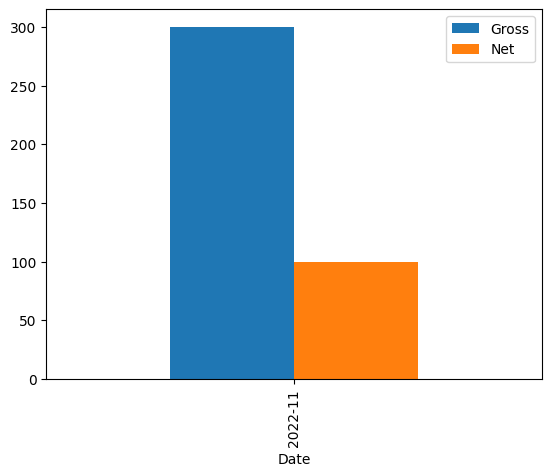

In [69]:
df4 = graph(df4)
df4.plot.bar()

# g5 = df5
# g5 = graph(df5)
# g5

In [70]:
by_cust =(df0['Customer']).value_counts().sort_index()
df0_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df0_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df0_customer = df0_customer.reset_index(drop=True)
df0_customer
# df0_customer.to_csv(r'output/370_customers.csv', index=False)

,Customer,counts


In [71]:
df0['Date'] = pd.to_datetime(df0['Date'])
df0['Date'] = df0['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df0 = df0.groupby(df0['Date']).aggregate(agg_functions)

# print(df0)

# df_new.to_csv(r'df5.csv', index=False)

In [72]:
# x-coordinates of left sides of bars 
left = df0['Date']
  
# heights of bars
Gross = df0['Gross']
Net = df0['Net']
  
# labels for bars
tick_label = df0['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('370 Net and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/370_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Error in callback <function _draw_all_if_interactive at 0x7b828a1b0670> (for post_execute):


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Figure size 640x480 with 1 Axes>

Store 372 Import and Clean 

In [ ]:
by_cust =(df1['Customer']).value_counts().sort_index()
df1_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df1_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df1_customer = df1_customer.reset_index(drop=True)
df1_customer
# df1_customer.to_csv(r'output/372_customers.csv', index=False)

,Customer,counts
0,"GOTTA GO, INC.",14
1,A & R LOGISTICS INC,13
2,DUBOIS COUNTY TIRE & SUPP,6
3,"GOTTA GO, INC. - TRACKING",5
4,MISTER P EXPRESS INC.,3
5,ERNST CONCRETE KENTUCKIAN,2
6,MILLER TRANSPORTATION/ IN,2
7,RAY-LEE TRANSPORT,2
8,A&S TRUCK RD SERVICE LLC,1
9,C-JAMS,1


In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date'] = df1['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df1 = df1.groupby(df1['Date']).aggregate(agg_functions)

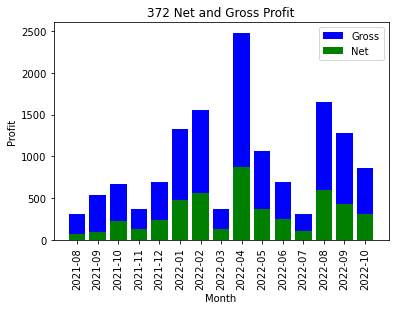

In [ ]:
# x-coordinates of left sides of bars 
left = df1['Date']
  
# heights of bars
Gross = df1['Gross']
Net = df1['Net']
  
# labels for bars
tick_label = df1['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('372 Net and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/372_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()

Store 373 Import and Clean 

In [ ]:
by_cust =(df2['Customer']).value_counts().sort_index()
df2_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df2_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df2_customer = df2_customer.reset_index(drop=True)
df2_customer
# df2_customer.to_csv(r'output/373_customers.csv', index=False)

,Customer,counts
0,BROTHERS FARMS,4
1,"REPUBLIC SERVICES, INC. 3058",2
2,SMITH GRAIN,1


In [ ]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Date'] = df2['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df2 = df2.groupby(df2['Date']).aggregate(agg_functions)

# print(df2)


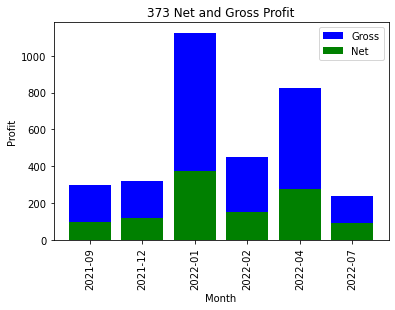

In [ ]:
# x-coordinates of left sides of bars 
left = df2['Date']
  
# heights of bars
Gross = df2['Gross']
Net = df2['Net']
  
# labels for bars
tick_label = df2['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('373 Net and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/373_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()

Store 374 Import and Clean 

In [ ]:
by_cust =(df3['Customer']).value_counts().sort_index()
df3_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df3_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df3_customer = df3_customer.reset_index(drop=True)
df3_customer
# df3_customer.to_csv(r'output/374_customers.csv', index=False)

,Customer,counts
0,UHL IDEALEASE - AUSTIN,3
1,MIDNIGHT FLYER & CO. INC.,2
2,"R W TRANSPORT, INC",2
3,FOX FARMS,1
4,NEW WAY TRANSPORTATION,1
5,NORTH VERNON BEVERAGE,1
6,PADGETT TRUCKING INC/OMARA,1
7,SCHROER TRUCKING,1


In [ ]:
df3['Date'] = pd.to_datetime(df3['Date'])
df3['Date'] = df3['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df3 = df3.groupby(df3['Date']).aggregate(agg_functions)

# print(df3)

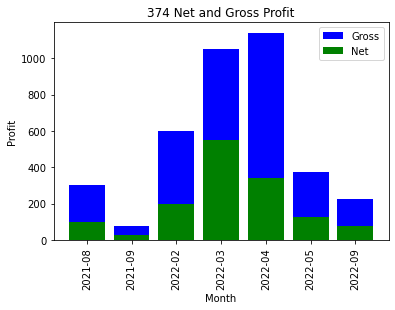

In [ ]:
# x-coordinates of left sides of bars 
left = df3['Date']
  
# heights of bars
Gross = df3['Gross']
Net = df3['Net']
  
# labels for bars
tick_label = df3['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('374 Net and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/374_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()

Store 375 Import and Clean 

In [ ]:
by_cust =(df4['Customer']).value_counts().sort_index()
df4_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df4_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df4_customer = df4_customer.reset_index(drop=True)
df4_customer
# df4_customer.to_csv(r'output/375_customers.csv', index=False)


,Customer,counts
0,HARROD TRANSPORT,1


In [ ]:
df4['Date'] = pd.to_datetime(df4['Date'])
df4['Date'] = df4['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df4 = df4.groupby(df4['Date']).aggregate(agg_functions)

# print(df4)

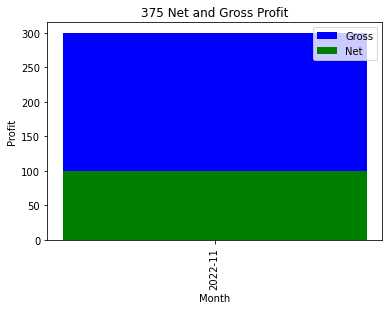

In [ ]:
# x-coordinates of left sides of bars 
left = df4['Date']
  
# heights of bars
Gross = df4['Gross']
Net = df4['Net']
  
# labels for bars
tick_label = df4['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('375 Net and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/375_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()

In [ ]:
by_cust =(df5['Customer']).value_counts().sort_index()
df5_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df5_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df5_customer = df5_customer.reset_index(drop=True)
df5_customer
df5_customer.to_csv(r'output/376_customers.csv', index=False)

In [ ]:
df5['Date'] = pd.to_datetime(df5['Date'])
df5['Date'] = df5['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df5 = df5.groupby(df5['Date']).aggregate(agg_functions)

# print(df5)

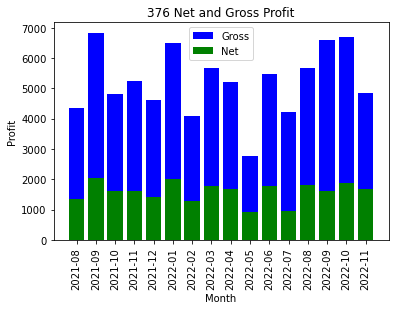

In [ ]:
# x-coordinates of left sides of bars 
left = df5['Date']
  
# heights of bars
Gross = df5['Gross']
Net = df5['Net']
  
# labels for bars
tick_label = df5['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('376 Net and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/376_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()

In [ ]:
frames = [df0, df1, df2, df3, df4, df5]

df99 = pd.concat(frames)
# df99.drop(columns=['Date'], inplace=True)
# df99.head(30)

# print(df99['Net'].sum())
# print(df99['Gross'].sum())

In [ ]:
frames = [df0, df1, df2, df3, df4, df5]

df99 = pd.concat(frames)
df99.head()

# print(df99['Net'].sum())
# print(df99['Gross'].sum())


Net_Gross = {
    '370_Gross' : df0['Gross'].sum(),
    '370_net' : df0['Net'].sum(),
    '372_Gross' : df1['Gross'].sum(),
    '372_net' : df1['Net'].sum(),
    '373_Gross' : df2['Gross'].sum(),
    '373_net' : df2['Net'].sum(),
    '374_Gross' : df3['Gross'].sum(),
    '374_net' : df3['Net'].sum(),
    '375_Gross' : df4['Gross'].sum(),
    '375_net' : df4['Net'].sum(),
    '376_Gross' : df5['Gross'].sum(),
    '376_net' : df5['Net'].sum(),
}

data = Net_Gross
names = list(data.keys())
values = list(data.values())


# print('Total Gross:',(Total_Gross))
# print('Total Net:',(Total_net))


In [ ]:
df99['Date'] = pd.to_datetime(df99['Date'])
df99['Date'] = df99['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df99 = df99.groupby(df99['Date']).aggregate(agg_functions)

# print(df99)

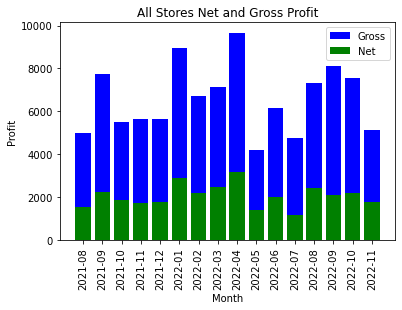

In [ ]:
# x-coordinates of left sides of bars 
left = df99['Date']
  
# heights of bars
Gross = df99['Gross']
Net = df99['Net']
  
# labels for bars
tick_label = df99['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('All Stores Net and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/all_stores_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()
